In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

In [23]:
path = Path('Z:/nahaUsers/casadje/EFASv6/reservoirs/tests/Ebro')

In [24]:
path_obs = Path('Z:/nahaUsers/casadje/datasets/CEDEX/processed/reservoirs/timeseries')

In [25]:
obs = pd.read_csv(path_obs / '9831.csv', parse_dates=True, index_col='date')
print(obs.shape)
dates = pd.date_range(start=obs.index.min(), end=obs.index.max(), freq='D')
obs = obs.reindex(dates)
print(obs.shape)

(16071, 3)
(22646, 3)


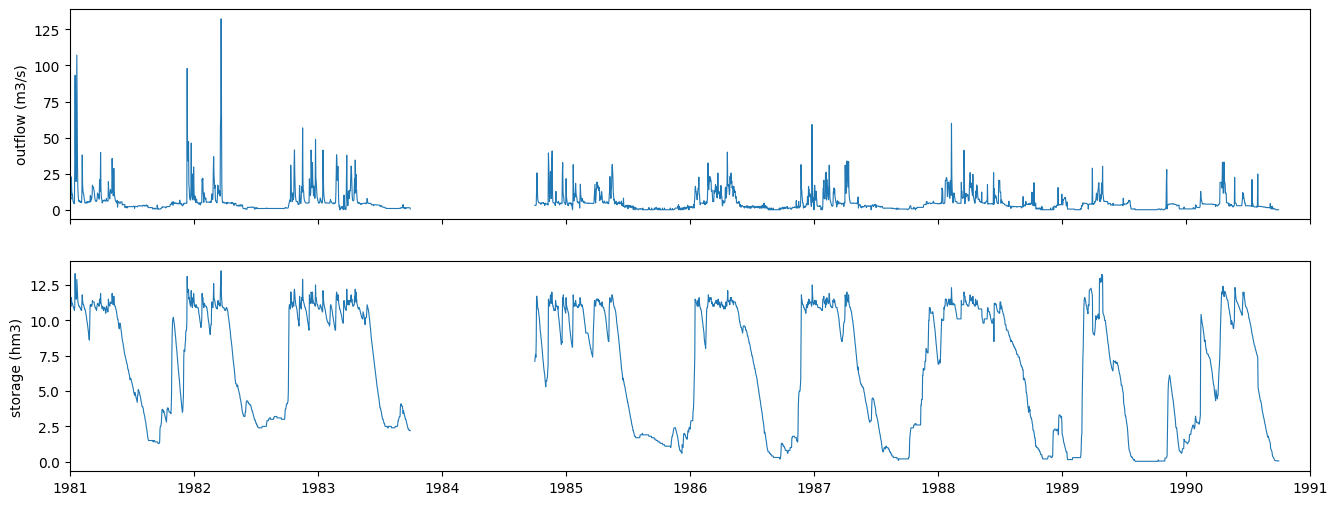

In [32]:
lineprops = {'lw': .8}

fig, ax = plt.subplots(nrows=2, figsize=(16, 6), sharex=True)

ax[0].plot(obs.outflow, **lineprops)
ax[0].set(
    # xlim=(obs.index.min(), obs.index.max()),
    xlim=(datetime(1981, 1, 1), datetime(1991, 1, 1)),
    ylabel='outflow (m3/s)'
)

ax[1].plot(obs.storage, **lineprops)
ax[1].set(
    ylabel='storage (hm3)'
)

plt.show()

In [30]:
obs.outflow.describe()

count    12442.000000
mean         5.358667
std          7.324390
min          0.000000
25%          2.350000
50%          3.250000
75%          5.100000
max        132.300000
Name: outflow, dtype: float64

In [29]:
obs.outflow.mean()

np.float64(5.358666532711783)

***

In [79]:

path_obs = path / 'HYDRO' / 'timeseries'
path_resops = Path('Z:/nahaUsers/casadje/datasets/reservoirs/ResOpsES/v3.0')

## Station 615

Affected by reservoirs with GDW ID 1410 and 5950.

| GDW_ID | GRanD_ID | EFAS_ID |
| ------ | -------- | ------- |
| 1410 | 2677 | 9497 |
| 5950 | 2661 | 9455 |

In [56]:
# observed streamflow in the gauging station
streamflow = pd.read_csv(path_obs / '615.csv', index_col=0, parse_dates=True).squeeze()
streamflow.name = 'streamflow'

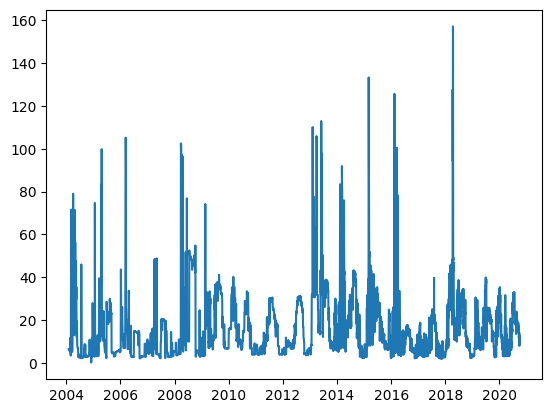

In [87]:
resops = pd.read_csv(path_resops / 'time_series' / 'csv' / '2677.csv', parse_dates=True, index_col=0, usecols=['date', 'outflow', 'storage'])

plt.plot(resops.outflow)

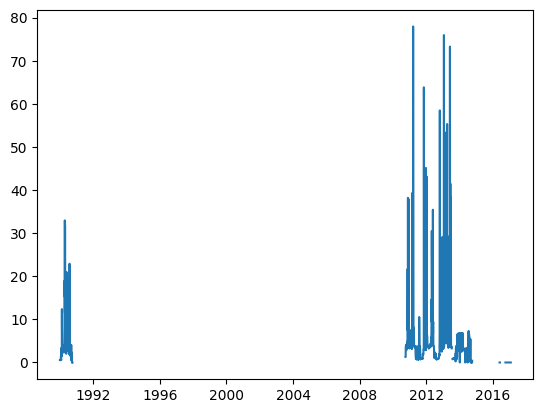

In [90]:
resops = pd.read_csv(path_resops / 'time_series' / 'csv' / '2661.csv', parse_dates=True, index_col=0, usecols=['date', 'outflow', 'storage'])

plt.plot(resops.outflow)

In [85]:
# observed releases in the reservoirs
release1 = pd.read_csv(path_obs / '9497.csv', index_col=0, parse_dates=True).squeeze()
release1.name = 'release_9497'

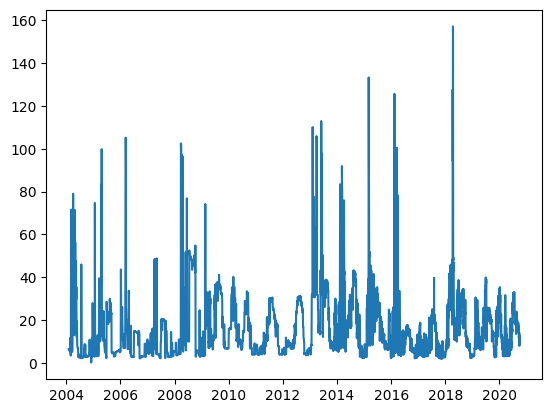

In [86]:
plt.plot(release1)

In [75]:
# observed releases in the reservoirs
release2 = pd.read_csv(path_obs / '9455.csv', index_col=0, parse_dates=True).squeeze()
release2.name = 'release_5950'

<Axes: xlabel='time'>

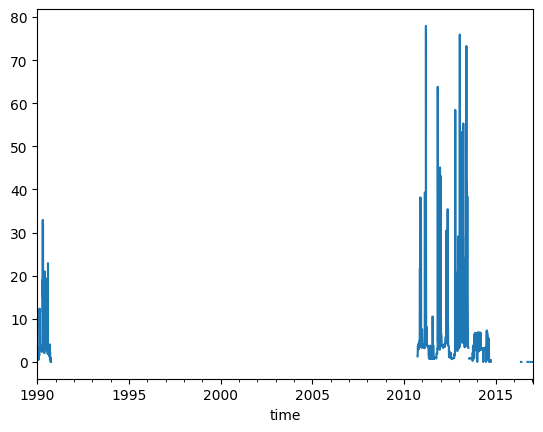

In [78]:
release2.plot()

In [70]:
# release_sim = pd.read_csv(path / 'RES_outflow.csv', usecols=['Timestamp', 1410], index_col=0, parse_dates=True).squeeze()

In [76]:
# concat and keep overlapping period
data = pd.concat((streamflow, release1, release2), axis=1)
mask = data.notnull().all(axis=1)
start, end = data[mask].index[0], data[mask].index[-1]
data = data.loc[start:end]

IndexError: index 0 is out of bounds for axis 0 with size 0

AttributeError: 'DataFrame' object has no attribute 'release'

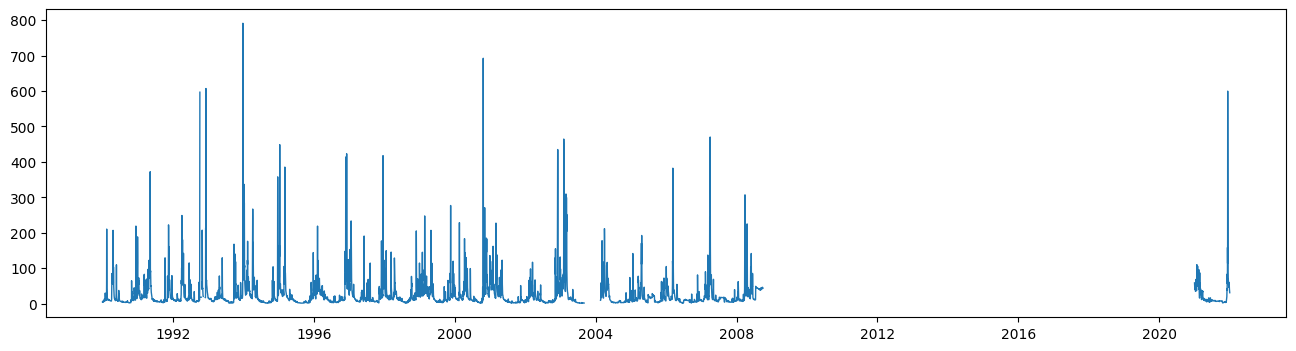

In [77]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(
    data.streamflow, 
    lw=1,
    label='streamflow'
)
ax.plot(
    data.release, 
    lw=1,
    ls='--',
    label='release'
)
ax.set(
    xlim=(start, end),
    ylabel='m3/s',
)
ax.legend(frameon=False);